# Prediciones de ABANDONO y FINALIZACION de Estudios

### LIBRERIAS del PROYECTO

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import operator

#Transformaciones:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#Normalizar:
from sklearn.preprocessing import MinMaxScaler

#MODELOS
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#MEDICIONES:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.metrics import confusion_matrix





### LEER ARCHIVO

In [2]:
ruta =  'C:/Users/juand/OneDrive/Escritorio/PORTFOLIO - DS 2024/KAGGLE/proyecto_01/data_estudiantes.csv'
data= pd.read_csv(ruta, delimiter=';')
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,39,1,9003,1,3,110.0,1,3,19,...,6,12,14,12,18,0,16.2,0.3,-0.92,Graduate
1,1,39,1,9130,1,1,133.1,1,1,19,...,0,5,10,3,13,2,10.8,1.4,1.74,Dropout
2,2,39,1,9119,1,1,120.0,1,34,34,...,0,5,9,2,13,0,9.4,-0.8,-3.12,Dropout
3,1,1,1,9119,1,1,168.0,1,19,19,...,0,5,8,5,19,0,12.4,0.5,1.79,Graduate
4,1,43,1,9119,1,1,140.0,1,37,38,...,0,5,11,1,17,0,13.9,-0.3,0.79,Dropout


### INICIO ANALISIS

#### Información del DATA SET

In [3]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [4]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

El DS no posee datos Nulos.

In [5]:
data.count()

Marital status                                    4424
Application mode                                  4424
Application order                                 4424
Course                                            4424
Daytime/evening attendance\t                      4424
Previous qualification                            4424
Previous qualification (grade)                    4424
Nacionality                                       4424
Mother's qualification                            4424
Father's qualification                            4424
Mother's occupation                               4424
Father's occupation                               4424
Admission grade                                   4424
Displaced                                         4424
Educational special needs                         4424
Debtor                                            4424
Tuition fees up to date                           4424
Gender                                            4424
Scholarshi

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### Modificar Nombre de Variables
* Mother's qualification
* Father's qualification 
* Mother's occupation 
* Father's occupation  

In [7]:
old_names = {
    "Mother's qualification": "mom_qualification",
    "Father's qualification": "dad_qualification",
    "Mother's occupation": "mom_occupation",
    "Father's occupation": "dad_occupation",
    "Daytime/evening attendance	": "daytime_evening",
    'Tuition fees up to date': 'matricula_al_dia',
    'GDP': 'pbi',
    'Curricular units 1st sem (grade)': 'curricular_primer_semestre',
    'Curricular units 2nd sem (grade)': 'curricular_segundo_semestre'

}

new_data = data.rename(columns=old_names)
new_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'daytime_evening', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality', 'mom_qualification',
       'dad_qualification', 'mom_occupation', 'dad_occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'matricula_al_dia', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)', 'curricular_primer_semestre',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'curricular_segundo_semestre',
       'Curricular units 2nd sem (without evaluations)', 'Unempl

In [8]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.0,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.0,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.0,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.0,9238.00,9556.00,9991.00
daytime_evening,4424.0,0.890823,0.311897,0.00,1.0,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.0,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.0,133.10,140.00,190.00
Nacionality,4424.0,1.873192,6.914514,1.00,1.0,1.00,1.00,109.00
mom_qualification,4424.0,19.561935,15.603186,1.00,2.0,19.00,37.00,44.00
dad_qualification,4424.0,22.275316,15.343108,1.00,3.0,19.00,37.00,44.00


In [9]:
new_data

,Marital status,Application mode,Application order,Course,daytime_evening,Previous qualification,Previous qualification (grade),Nacionality,mom_qualification,dad_qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),curricular_segundo_semestre,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,pbi,Target
0,2,39,1,9003,1,3,110.0,1,3,19,...,6,12,14,12,18,0,16.2,0.3,-0.92,Graduate
1,1,39,1,9130,1,1,133.1,1,1,19,...,0,5,10,3,13,2,10.8,1.4,1.74,Dropout
2,2,39,1,9119,1,1,120.0,1,34,34,...,0,5,9,2,13,0,9.4,-0.8,-3.12,Dropout
3,1,1,1,9119,1,1,168.0,1,19,19,...,0,5,8,5,19,0,12.4,0.5,1.79,Graduate
4,1,43,1,9119,1,1,140.0,1,37,38,...,0,5,11,1,17,0,13.9,-0.3,0.79,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,3,171,1,1,137.0,1,1,3,...,0,0,0,0,0,0,12.7,3.7,-1.70,Graduate
4420,1,39,1,9003,1,1,130.0,1,12,12,...,0,6,10,0,0,0,12.4,0.5,1.79,Dropout
4421,1,43,1,9991,0,1,161.0,1,37,37,...,0,5,5,0,0,0,7.6,2.6,0.32,Dropout
4422,1,1,2,9238,1,1,145.0,1,1,19,...,0,5,11,0,0,0,9.4,-0.8,-3.12,Enrolled


* Quitar Columna Tipo Objet:

In [10]:
new_data.drop(['curricular_primer_semestre','curricular_segundo_semestre' ], axis=1, inplace=True)
new_data

,Marital status,Application mode,Application order,Course,daytime_evening,Previous qualification,Previous qualification (grade),Nacionality,mom_qualification,dad_qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,pbi,Target
0,2,39,1,9003,1,3,110.0,1,3,19,...,0,6,12,14,12,0,16.2,0.3,-0.92,Graduate
1,1,39,1,9130,1,1,133.1,1,1,19,...,2,0,5,10,3,2,10.8,1.4,1.74,Dropout
2,2,39,1,9119,1,1,120.0,1,34,34,...,0,0,5,9,2,0,9.4,-0.8,-3.12,Dropout
3,1,1,1,9119,1,1,168.0,1,19,19,...,0,0,5,8,5,0,12.4,0.5,1.79,Graduate
4,1,43,1,9119,1,1,140.0,1,37,38,...,0,0,5,11,1,0,13.9,-0.3,0.79,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,3,171,1,1,137.0,1,1,3,...,0,0,0,0,0,0,12.7,3.7,-1.70,Graduate
4420,1,39,1,9003,1,1,130.0,1,12,12,...,0,0,6,10,0,0,12.4,0.5,1.79,Dropout
4421,1,43,1,9991,0,1,161.0,1,37,37,...,0,0,5,5,0,0,7.6,2.6,0.32,Dropout
4422,1,1,2,9238,1,1,145.0,1,1,19,...,0,0,5,11,0,0,9.4,-0.8,-3.12,Enrolled


#### AGRUPACIONES VARIAS 

In [11]:
new_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'daytime_evening', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality', 'mom_qualification',
       'dad_qualification', 'mom_occupation', 'dad_occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'matricula_al_dia', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'pbi', 'Target'],
    

##### Primeros INSIGHT

In [12]:
agrup_target = new_data.groupby("Target").size()
agrup_target

Target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64

##### AGRUPADO Target y Estado Civil
* 1: Soltero/a
* 2: Casado/a
* 3: Viudo/a
* 4: Divorciado/a
* 5: Separado/a
* 6: Otra situación (por ejemplo, unión libre, poligamia)

In [13]:
grupo_estado_civil = new_data.groupby(['Target', 'Marital status']).size().unstack()
#grupo_estado_civil['TOTAL'] = grupo_estado_civil.sum(axis=1)
grupo_estado_civil

Marital status,1,2,3,4,5,6
Target,,,,,,
Dropout,1184,179,1,42,11,4
Enrolled,720,52,2,16,3,1
Graduate,2015,148,1,33,11,1


* GRAFICO

<Figure size 1000x600 with 0 Axes>

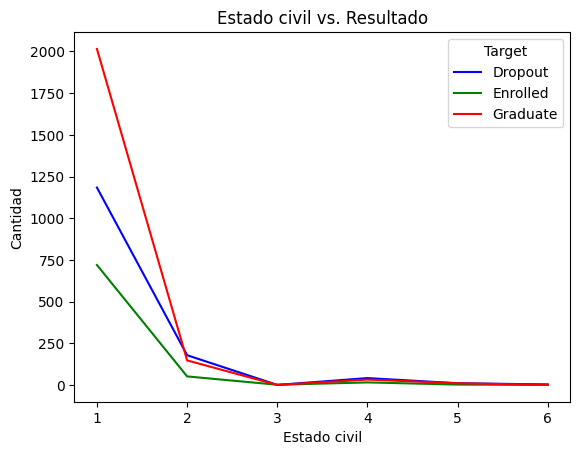

In [14]:
plt.figure(figsize=(10, 6))
grupo_estado_civil.T.plot(kind='line', color=['blue', 'green', 'red'])
plt.title('Estado civil vs. Resultado')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad')
plt.show()


##### AGRUPADO Target y Genero
* 0: Femenino
* 1: Masculino

In [15]:
grupo_genero = new_data.groupby(['Target', 'Gender']).size().unstack()
#grupo_genero['TOTAL'] = grupo_genero.sum(axis=1)
grupo_genero

Gender,0,1
Target,,
Dropout,720,701
Enrolled,487,307
Graduate,1661,548


* GRAFICO

<Figure size 1000x600 with 0 Axes>

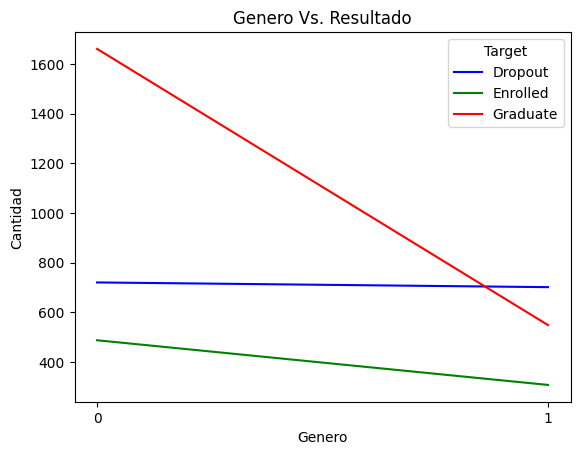

In [16]:
plt.figure(figsize=(10, 6))
grupo_genero.T.plot(kind='line', color=['blue', 'green', 'red'])
plt.xticks([0, 1]) 
plt.title ('Genero Vs. Resultado')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()


##### AGRUPADO Target y Nacionalidad

In [17]:
grupo_nacionalidad = new_data.groupby(['Target', 'Nacionality']).size().unstack()
#grupo_nacionalidad['TOTAL'] = grupo_nacionalidad.sum(axis=1)
grupo_nacionalidad = grupo_nacionalidad.fillna(0)
grupo_nacionalidad

Nacionality,1,2,6,11,13,14,17,21,22,24,...,26,32,41,62,100,101,103,105,108,109
Target,,,,,,,,,,,,,,,,,,,,,
Dropout,1389.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0,...,1.0,0.0,14.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
Enrolled,770.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,5.0,1.0,6.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
Graduate,2155.0,2.0,4.0,3.0,1.0,1.0,0.0,0.0,8.0,4.0,...,8.0,0.0,18.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0


##### AGRUPADO Ratio de Desempleo, Inflación y PBI

* Desempleo

In [18]:
grupo_desempleo = new_data.groupby(['Unemployment rate', 'Target']).size().unstack()
#grupo_desempleo['TOTAL'] = grupo_desempleo.sum(axis=1)
grupo_desempleo = grupo_desempleo.fillna(0)
grupo_desempleo

Target,Dropout,Enrolled,Graduate
Unemployment rate,,,
7.6,202,119,250
8.9,102,77,189
9.4,174,109,250
10.8,182,90,253
11.1,117,67,230
12.4,107,90,248
12.7,141,63,215
13.9,118,64,208
15.5,139,69,189


<Figure size 600x300 with 0 Axes>

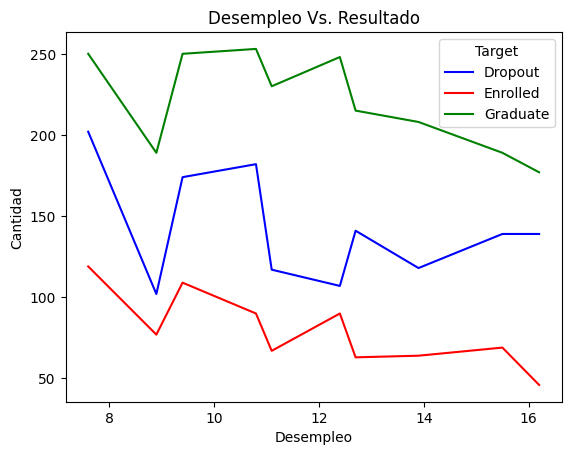

In [19]:
plt.figure(figsize= (6,3))
grupo_desempleo.plot(kind='line', color= ['blue', 'red', 'green'])
plt.title ('Desempleo Vs. Resultado')
plt.xlabel('Desempleo')
plt.ylabel('Cantidad')
plt.show()




* Inflación:

In [20]:
grupo_inflacion = new_data.groupby(['Inflation rate','Target']).size().unstack()
#grupo_inflacion ['TOTAL'] = grupo_inflacion.sum(axis=1)
grupo_inflacion = grupo_inflacion.fillna(0)
grupo_inflacion

Target,Dropout,Enrolled,Graduate
Inflation rate,,,
-0.8,174,109,250
-0.3,118,64,208
0.3,139,46,177
0.5,107,90,248
0.6,117,67,230
1.4,284,167,442
2.6,202,119,250
2.8,139,69,189
3.7,141,63,215


<Figure size 600x300 with 0 Axes>

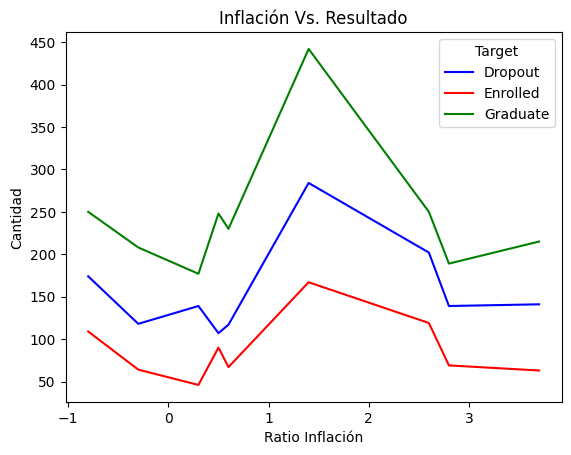

In [21]:
plt.figure(figsize=(6,3))
grupo_inflacion.plot(kind='line', color=['blue', 'red', 'green'])
plt.title('Inflación Vs. Resultado')
plt.xlabel('Ratio Inflación')
plt.ylabel('Cantidad')
plt.show()

* PBI

In [22]:
grupo_pbi = new_data.groupby(['pbi','Target']).size().unstack()
#grupo_pbi ['TOTAL'] = grupo_pbi.sum(axis=1)
grupo_pbi = grupo_pbi.fillna(0)
grupo_pbi

Target,Dropout,Enrolled,Graduate
pbi,,,
-4.06,139,69,189
-3.12,174,109,250
-1.70,141,63,215
-0.92,139,46,177
0.32,202,119,250
0.79,118,64,208
1.74,182,90,253
1.79,107,90,248
2.02,117,67,230


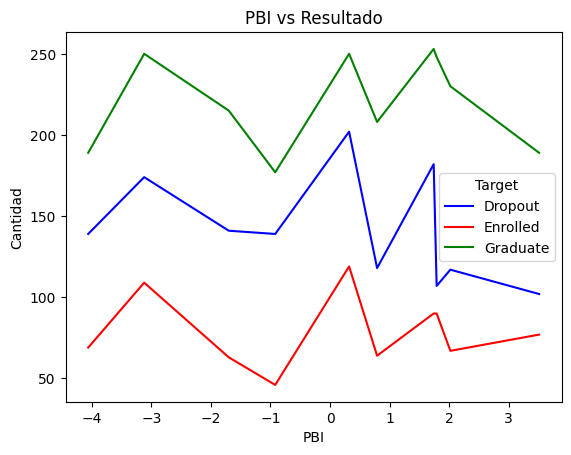

In [23]:
plt.Figure(figsize=(6,3))
grupo_pbi.plot(kind='line', color=['blue', 'red', 'green'])
plt.title('PBI vs Resultado')
plt.xlabel('PBI')
plt.ylabel('Cantidad')
plt.show()

##### AGRUPADO Comportamiento Pago Matricula

In [24]:
grupo_pago_matricula = new_data.groupby(['matricula_al_dia','Target']).size().unstack()
#grupo_pago_matricula ['TOTAL'] = grupo_pago_matricula.sum(axis=1)
grupo_pago_matricula = grupo_pago_matricula.fillna(0)
grupo_pago_matricula

Target,Dropout,Enrolled,Graduate
matricula_al_dia,,,
0,457,42,29
1,964,752,2180


* GRAFICO

<Figure size 600x300 with 0 Axes>

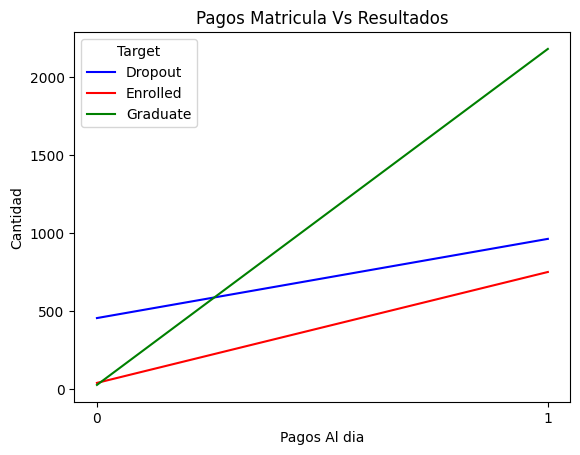

In [25]:
plt.figure(figsize=(6,3))
grupo_pago_matricula.plot(kind='line', color=['blue', 'red', 'green'])
plt.xticks([0,1])
plt.title('Pagos Matricula Vs Resultados')
plt.xlabel('Pagos Al dia')
plt.ylabel('Cantidad')
plt.show()

##### AGRUPADO Edad de Inscripcion

In [26]:
grupo_edad_insc = new_data.groupby([ 'Age at enrollment','Target']).size().unstack()
#grupo_edad_insc['TOTAL'] = grupo_edad_insc.sum(axis=1)
grupo_edad_insc = grupo_edad_insc.fillna(0)
grupo_edad_insc

Target,Dropout,Enrolled,Graduate
Age at enrollment,,,
17,0.0,2.0,3.0
18,202.0,172.0,662.0
19,207.0,157.0,547.0
20,133.0,140.0,326.0
21,93.0,70.0,159.0
22,58.0,37.0,79.0
23,41.0,24.0,43.0
24,56.0,30.0,45.0
25,47.0,21.0,25.0


* GRAFICO

<Figure size 600x300 with 0 Axes>

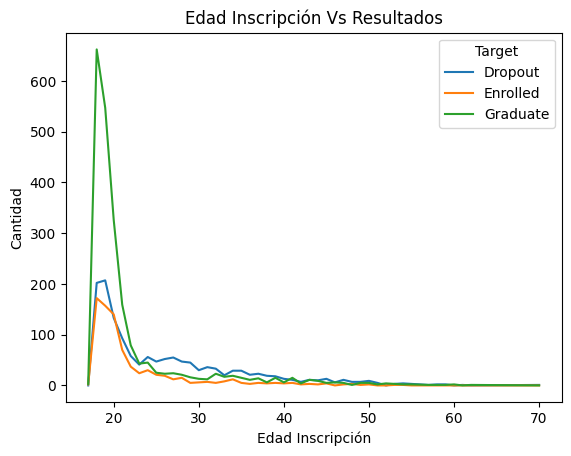

In [27]:
plt.figure(figsize=(6,3))
grupo_edad_insc.plot(kind='line')
plt.title ('Edad Inscripción Vs Resultados')
plt.xlabel('Edad Inscripción')
plt.ylabel('Cantidad')
plt.show()

##### AGRUPADO Hora Cursado

In [28]:
grupo_hora_cursado = new_data.groupby(['daytime_evening', 'Target']).size().unstack()
#grupo_hora_cursado['TOTAL'] = grupo_hora_cursado.sum(axis=1)
grupo_hora_cursado = grupo_hora_cursado.fillna(0)
grupo_hora_cursado

Target,Dropout,Enrolled,Graduate
daytime_evening,,,
0,207,75,201
1,1214,719,2008


* GRAFICO

<Figure size 600x300 with 0 Axes>

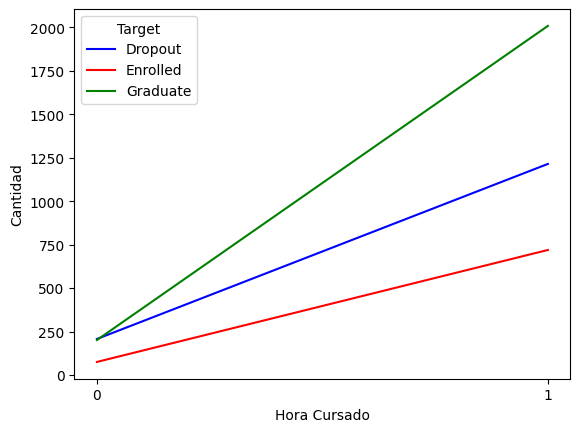

In [29]:
plt.figure(figsize=(6,3))
grupo_hora_cursado.plot(kind='line', color=['blue', 'red', 'green'])
plt.xticks([0,1])
plt.xlabel('Hora Cursado')
plt.ylabel('Cantidad')
plt.show()

##### AGRUPADO Educacion de Padres:
* Nivel 1: Educacion Inicial
* Nivel 50: Educación Profesional Avanzado

In [30]:
grupo_qualy_mom = new_data.groupby(['mom_qualification', 'Target']).size().unstack()
#grupo_qualy_mom ['TOTAL'] = grupo_qualy_mom.sum(axis=1)
grupo_qualy_mom = grupo_qualy_mom.fillna(0)
grupo_qualy_mom




Target,Dropout,Enrolled,Graduate
mom_qualification,,,
1,300.0,204.0,565.0
2,20.0,23.0,40.0
3,139.0,101.0,198.0
4,8.0,15.0,26.0
5,8.0,5.0,8.0
6,3.0,0.0,1.0
9,5.0,0.0,3.0
10,2.0,0.0,1.0
11,2.0,0.0,1.0


In [31]:
grupo_qualy_dad = new_data.groupby(['dad_qualification','Target' ]).size().unstack()
#grupo_qualy_dad ['TOTAL'] = grupo_qualy_dad.sum(axis=1)
grupo_qualy_dad = grupo_qualy_dad.fillna(0)
grupo_qualy_dad

Target,Dropout,Enrolled,Graduate
dad_qualification,,,
1,281.0,172.0,451.0
2,22.0,25.0,21.0
3,90.0,62.0,130.0
4,14.0,7.0,18.0
5,10.0,3.0,5.0
6,2.0,0.0,0.0
9,1.0,0.0,4.0
10,2.0,0.0,0.0
11,4.0,0.0,6.0


#### COMPARANDO GRAFICOS

##### Grafico Qualy Padres

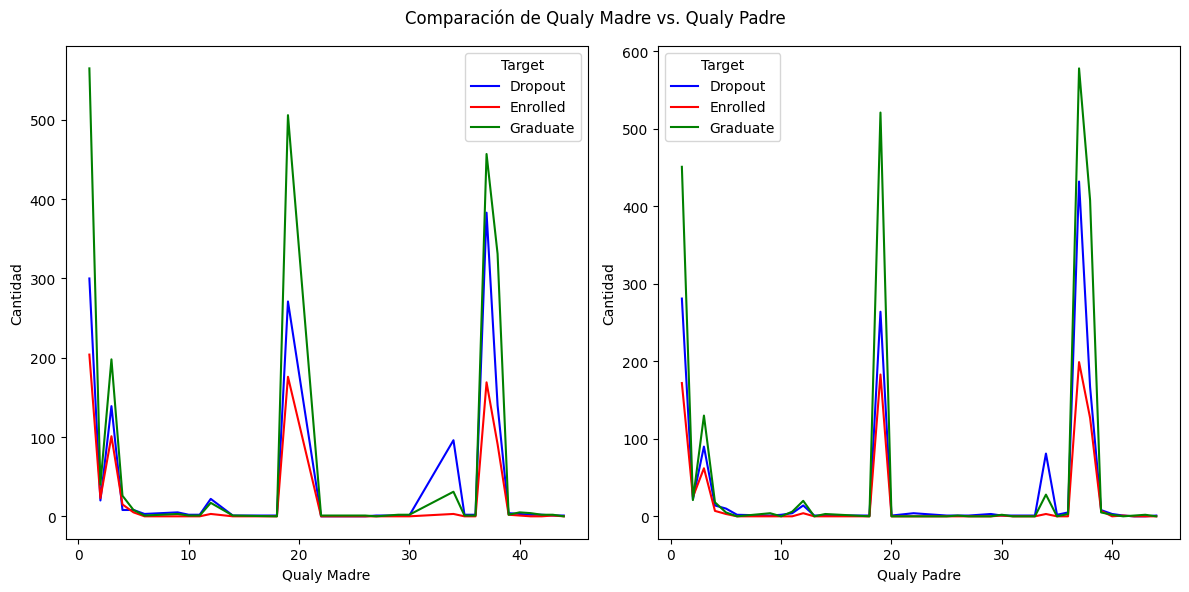

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
grupo_qualy_mom.plot(kind='line', color=['blue', 'red', 'green'], ax=axes[0])
axes[0].set_xlabel('Qualy Madre')
axes[0].set_ylabel('Cantidad')

grupo_qualy_dad.plot(kind='line', color=['blue', 'red', 'green'], ax=axes[1])
axes[1].set_xlabel('Qualy Padre')
axes[1].set_ylabel('Cantidad')

plt.suptitle('Comparación de Qualy Madre vs. Qualy Padre')
plt.tight_layout()
plt.show()

##### Grafico Indicadores Economicos

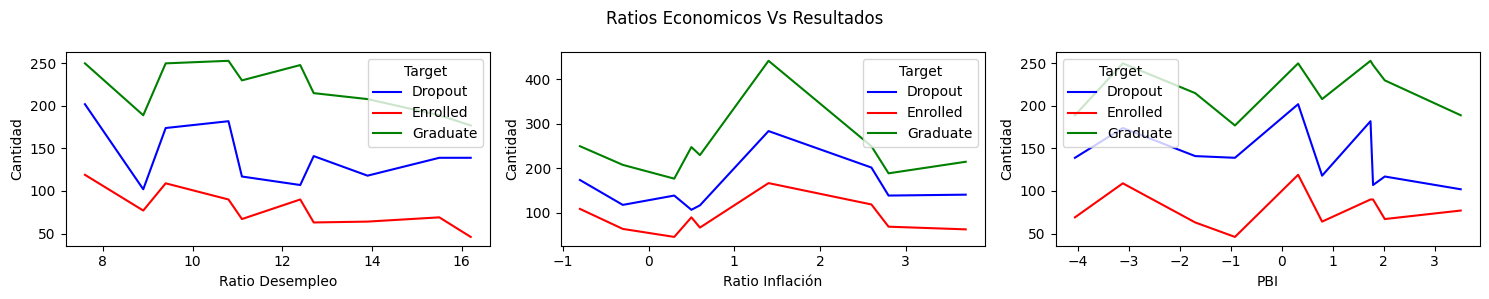

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
grupo_desempleo.plot(kind='line', color=['blue', 'red', 'green'], ax= axes[0])
axes[0].set_xlabel('Ratio Desempleo')
axes[0].set_ylabel('Cantidad')

grupo_inflacion.plot(kind='line', color=['blue', 'red', 'green'], ax= axes[1])
axes[1].set_xlabel('Ratio Inflación')
axes[1].set_ylabel('Cantidad')

grupo_pbi.plot(kind='line', color=['blue', 'red', 'green'], ax= axes[2])
axes[2].set_xlabel('PBI')
axes[2].set_ylabel('Cantidad')

plt.suptitle('Ratios Economicos Vs Resultados')
plt.tight_layout()
plt.show()


##### Hora Cursado y Edad de Inscrpcion

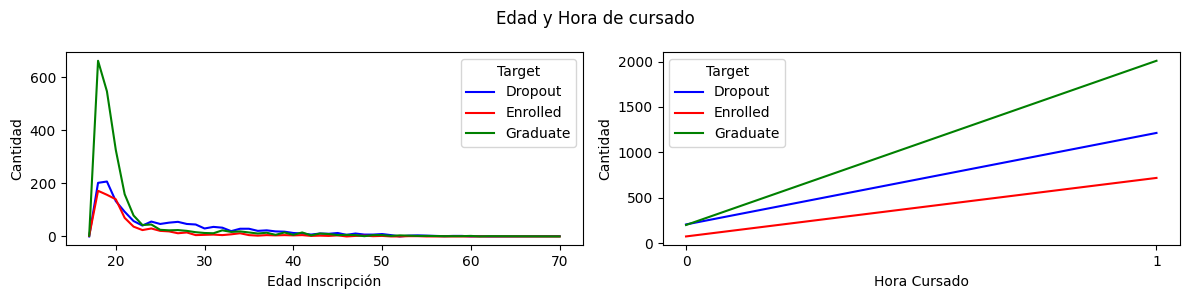

In [34]:
fig, axes = plt.subplots(1,2, figsize= (12,3))

grupo_edad_insc.plot(kind='line', color=['blue', 'red', 'green'], ax=axes[0])
axes[0].set_xlabel('Edad Inscripción')
axes[0].set_ylabel('Cantidad')

grupo_hora_cursado.plot(kind='line', color= ['blue', 'red','green'], ax= axes[1])
axes[1].set_xlabel('Hora Cursado')
plt.xticks([0,1])
axes[1].set_ylabel('Cantidad')

plt.suptitle('Edad y Hora de cursado')
plt.tight_layout()
plt.show()




### INICIO TRANSFORMACION y SPLIT de DATOS

#### TRANFORMACION Variable Dependiente (Target)
* Librerias: from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder = LabelEncoder()
new_data ['Target'] = label_encoder.fit_transform(new_data['Target'])
new_data['Target'].unique()

array([2, 0, 1])

#### SPLIT de DATOS:
* LIBRERIA: from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Target', axis=1), new_data['Target'], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3539, 34)
X_test shape: (885, 34)
y_train shape: (3539,)
y_test shape: (885,)


In [37]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### NORMALIZACION de Datos:
* LIBRERIA: from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

X_train_normalized = scaler_train.fit_transform(X_train)
X_test_normalized = scaler_test.fit_transform(X_test)

### SELECCION del MODELO a ENTRENAR:

#### RANDOM FOREST

In [39]:
modelo_random_forest = RandomForestClassifier(n_estimators=100)
new_data_RFC = modelo_random_forest.fit(X_train_normalized, y_train)

predicciones = modelo_random_forest.predict(X_test_normalized)

##### CALCULO METRICAS:

In [40]:
precision = precision_score(y_test, predicciones, average='weighted')
recall = recall_score(y_test, predicciones, average='weighted')
f1 = f1_score(y_test, predicciones, average='weighted')

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión: 0.7692009617897219
Recall: 0.7819209039548023
F1-score: 0.7647118526764725


##### MATRIZ de CONFUSION:

In [62]:
print(confusion_matrix(y_test, predicciones))

[[223  15  46]
 [ 34  49  66]
 [ 18  14 420]]


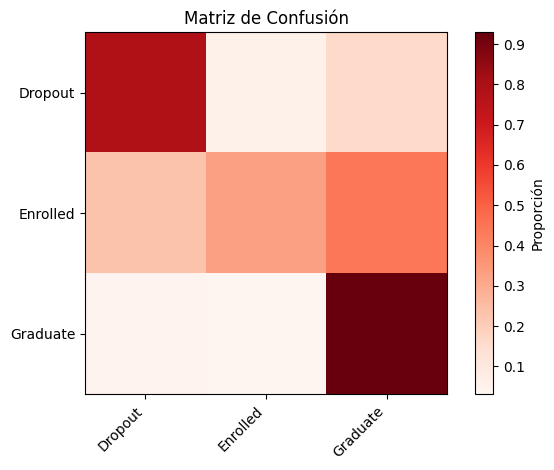

In [72]:
mat_confusion_rfc = np.array([[223,15,46], [34,49,66], [18,14,420]])
mat_confusion_rfc_norm = mat_confusion_rfc.astype('float') / mat_confusion_rfc.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
im = ax.imshow(mat_confusion_rfc_norm, cmap='Reds')

etiqueta_classes_rfc = ['Dropout', 'Enrolled', 'Graduate']

ax.set_xticks(np.arange(len(etiqueta_classes_rfc)))
ax.set_yticks(np.arange(len(etiqueta_classes_rfc)))
ax.set_xticklabels(etiqueta_classes_rfc, rotation=45, ha='right')
ax.set_yticklabels(etiqueta_classes_rfc)
ax.set_title('Matriz de Confusión')
fig.colorbar(im, label='Proporción')

plt.tight_layout()
plt.show()



* CONCLUCION - Random Forest Classifier:
    * En la Diagonal principal, podemos observar que el modelo posee una mayor presición en la clase "Graduate".
    * En las clases "Dropout" y "Enrolled", posee menor presición, identificando por ejemplo 46 datos de "Dropout", como si fueran "Graduate".

#### XGBoost
Librerias: 
* import xgboost as xgb
* GridSearch: from sklearn.model_selection import GridSearchCV

In [41]:
#CREAR el MODELO
model_XGB_GS = xgb.XGBClassifier()

parametros_GS = {'max_depth': [3,5,7], 'learning_rate': [0.1,0.01,0.001], 'n_estimators': [100,200,300]}
grid_search = GridSearchCV(estimator=model_XGB_GS, param_grid=parametros_GS, scoring='accuracy', cv=5)
grid_search.fit(X_train_normalized, y_train)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [42]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


##### CALCULO METRICAS

In [43]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1:", f1)

Accuracy: 0.7966101694915254
F1: 0.7867084962788233


#### CROSS Validation
* Libreria: from sklearn.model_selection import cross_val_score

In [49]:
new_data_cross_val = RandomForestClassifier()
scores = cross_val_score(new_data_cross_val, X_train_normalized, y_train, cv=5)

##### CALCULO METRICAS:

In [53]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.01)


##### MATRIZ de CONFUSION:

In [56]:
print(confusion_matrix(y_test, y_pred))

[[227  20  37]
 [ 33  63  53]
 [ 18  19 415]]


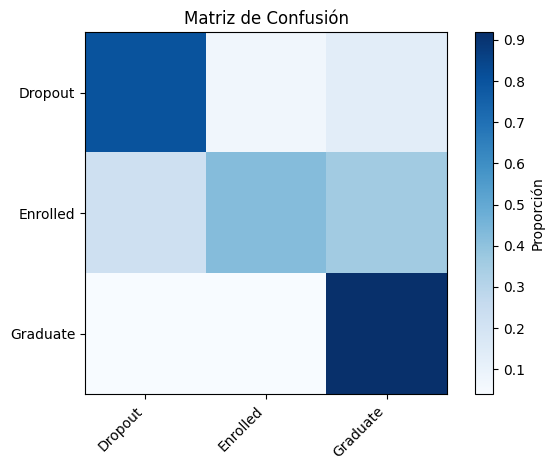

In [61]:
matriz_confusion = np.array([[227,  20,  37], [ 33,  63,  53], [ 18,  19, 415]])
matriz_confusion_norm = matriz_confusion.astype('float') / matriz_confusion.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
im = ax.imshow(matriz_confusion_norm, cmap='Blues')

etiqueta_classes = ['Dropout', 'Enrolled', 'Graduate']

ax.set_xticks(np.arange(len(etiqueta_classes)))
ax.set_yticks(np.arange(len(etiqueta_classes)))
ax.set_xticklabels(etiqueta_classes, rotation=45, ha='right')
ax.set_yticklabels(etiqueta_classes)
ax.set_title('Matriz de Confusión')
fig.colorbar(im, label='Proporción')

plt.tight_layout()
plt.show()


* Conclusión en el CROSS VALIDATION:
    * Podemos observar en la Diagonar principal que el mayor grado de acierto lo posee en la Etiqueda de "Graduate".
    * En los datos por fuera de la diagonar principal, podemos ver los desvíos o prediciones incorrectas. Por ejemplo, 37 estudiantes de "Dropout" fueron identificados como "Graduate".

El modelo parece tener un mejor desempeño en la clasificación de "Graduate".
En las clases de "Dropout" y "Enrolled", el modelo tiene mayores dificultades.